In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('//content/sentimentdataset.csv')

In [ ]:
df.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workout                              20.0   40.0   USA           
3   #Travel #Adventure                              8.0   15.0     UK          
4   #Cooking #Food                                 12.0   25.0    Australia    

   Year  Month  Day  Hour  
0  2023      1   15    12  
1  2023      1   15     8  
2  2023      1   15    15  
3  2023      1   15    18  
4  2023      1   15    19

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
df.shape

(732, 13)

In [ ]:
def count_distinct_value():
    for column in df.columns:
        num_distinct_values = len(df[column].unique())
        print(f"{column}: {num_distinct_values} distinct values")


count_distinct_value()

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


data cleaning

In [ ]:
df_features = df.select_dtypes(include=[object])

list(df_features.columns)

['Text', 'Sentiment', 'User', 'Platform', 'Hashtags', 'Country', 'Month']

In [57]:
df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [ ]:
df[list(df_features.columns)] = df[list(df_features.columns)].replace(r'\s+', '', regex=True)

In [ ]:
# remove duplicates
len_duplicated = len(df[df.duplicated(subset=['Text','Timestamp', 'Platform'])])

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Analyse temporelle
df['Hour'] = df['Timestamp'].dt.hour

map_mois = {
    1: 'Janvier',
    2: 'Fevrier',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Decembre'
}

df['Month'] = df['Month'].map(map_mois)

df['Month'] = df['Month'].astype('object')

In [ ]:
no_duplicated = df.drop_duplicates(subset=['Text','Timestamp', 'Platform'], keep='first')

In [ ]:
df['Platform'].value_counts()

Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: count, dtype: int64

Split the dataframe based on the platform

In [ ]:
no_duplicated['Platform'].unique()

array(['Twitter', 'Instagram', 'Facebook'], dtype=object)

In [ ]:
twitter = no_duplicated[no_duplicated["Platform"] == 'Twitter']
instagram = no_duplicated[no_duplicated["Platform"] == 'Instagram']
facebook = no_duplicated[no_duplicated["Platform"] == 'Facebook']

EXPLORATORY DATA ANALYSIS


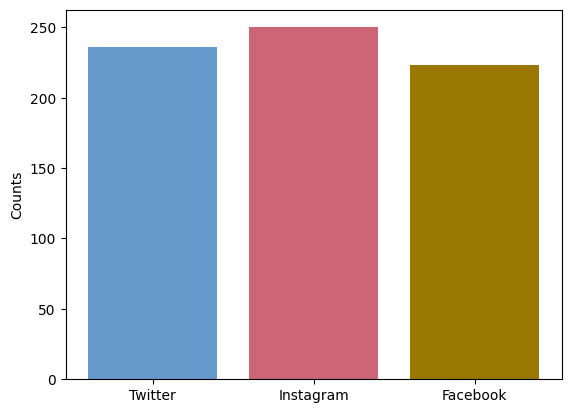

In [ ]:
plt.bar(['Twitter', 'Instagram', 'Facebook'],
        [twitter['Text'].count(), instagram['Text'].count(), facebook['Text'].count()],
        color=["#6699CC", '#CC6677', '#997700'])
plt.ylabel('Counts')
plt.show()

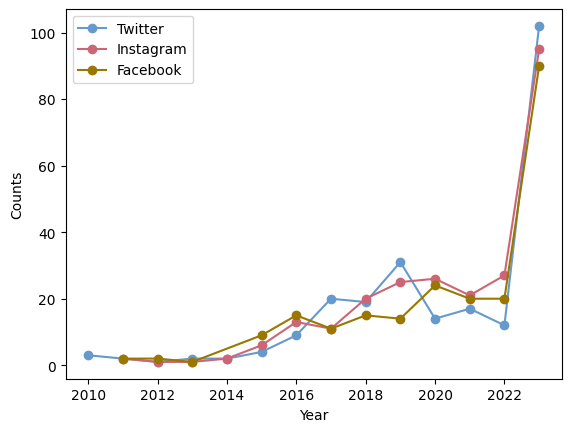

In [ ]:
plt.plot(twitter.groupby(['Year']).Platform.count(), color= "#6699CC", marker ='o', label='Twitter')
plt.plot(instagram.groupby(['Year']).Platform.count(), color= "#CC6677", marker ='o', label='Instagram')
plt.plot(facebook.groupby(['Year']).Platform.count(), color= "#997700", marker ='o', label='Facebook')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()

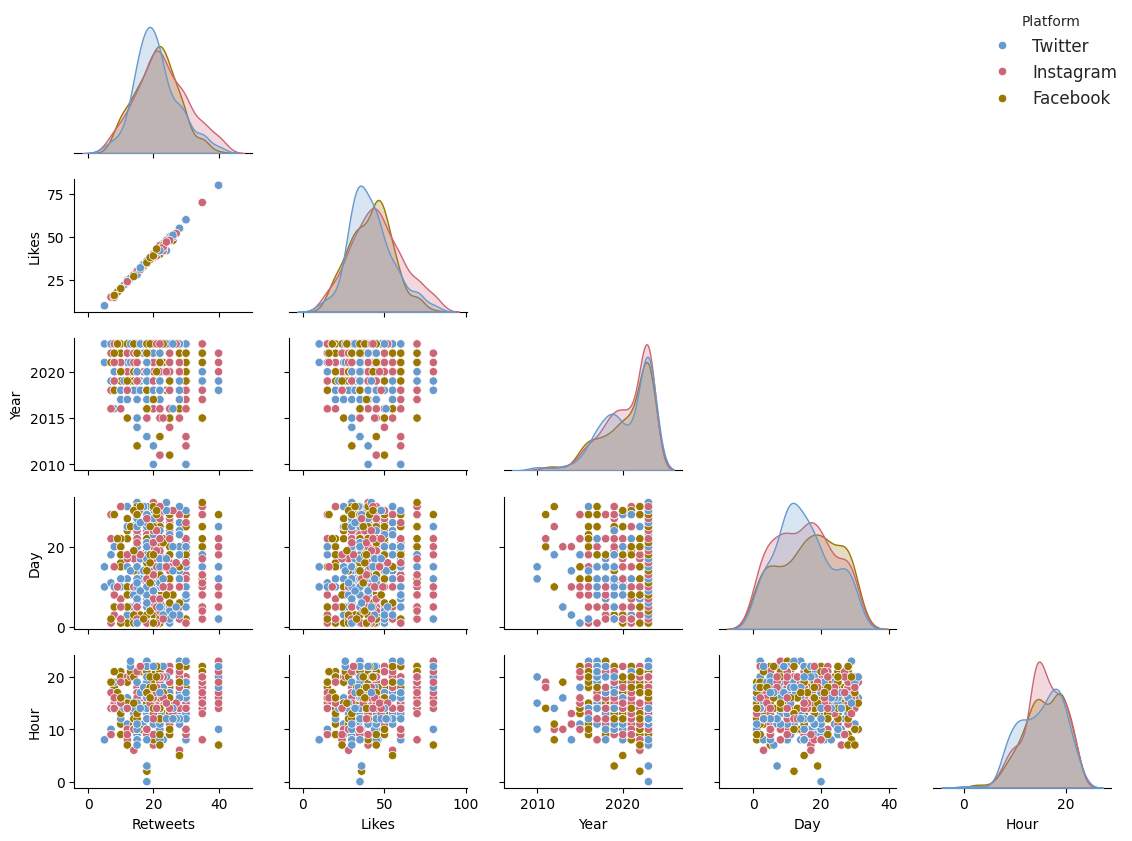

In [ ]:
ax = sns.pairplot(no_duplicated[['Platform', 'Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']],
                  hue = 'Platform',
                  palette={"Twitter": "#6699CC", "Instagram": "#CC6677", "Facebook": "#997700"},
                  corner=True, height=1.7, aspect=1.2)
sns.set(font_scale=1.1)
sns.move_legend(ax, "upper right")
plt.tight_layout()
plt.show()

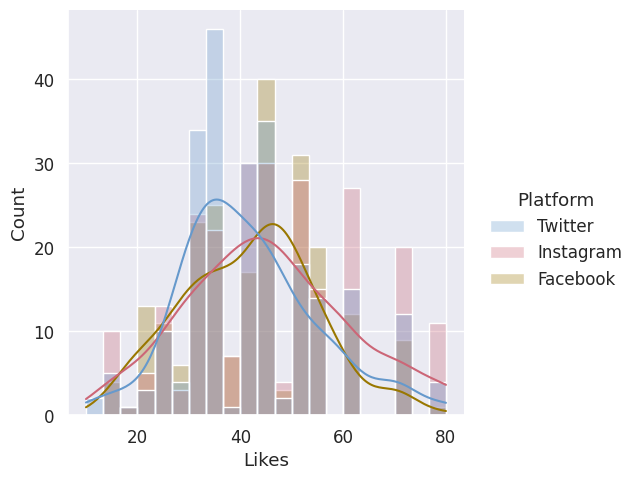

In [ ]:
sns.displot(data=no_duplicated[['Platform','Likes']], x="Likes", hue="Platform",
            palette = ["#6699CC", '#CC6677', '#997700'],
            alpha=0.3,
           # multiple='dodge',
           # multiple='stack',
            kde=True)
plt.show()

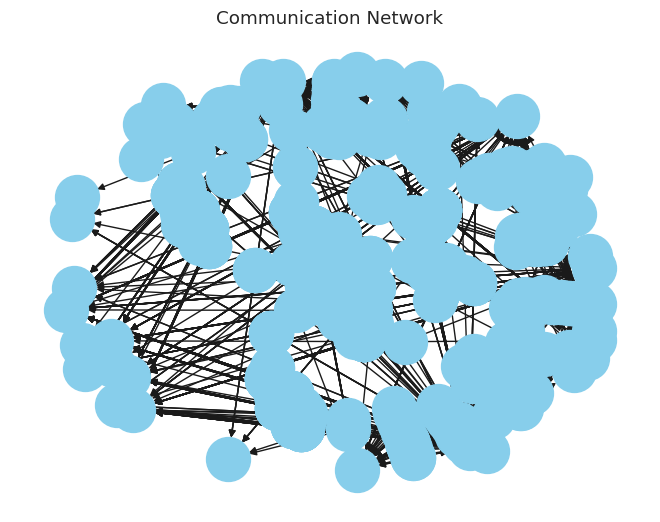

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('/content/sentimentdataset.csv')

# Create a directed graph
G = nx.DiGraph()

# Add edges based on retweets
for index, row in df.iterrows():
    G.add_edge(row['User'], row['Platform'])

# Add edges based on likes
for index, row in df.iterrows():
    G.add_edge(row['User'], row['Likes'])

# Visualize the communication network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue", font_size=10)
plt.title("Communication Network")
plt.show()


Nodes represent individual users and platforms.
Directed edges represent an interaction or connection from a user to a platform.

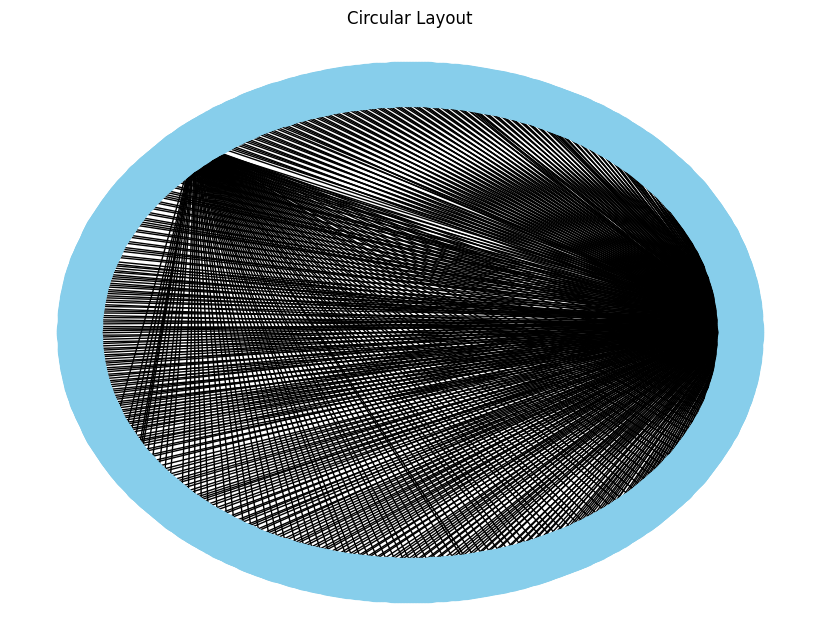

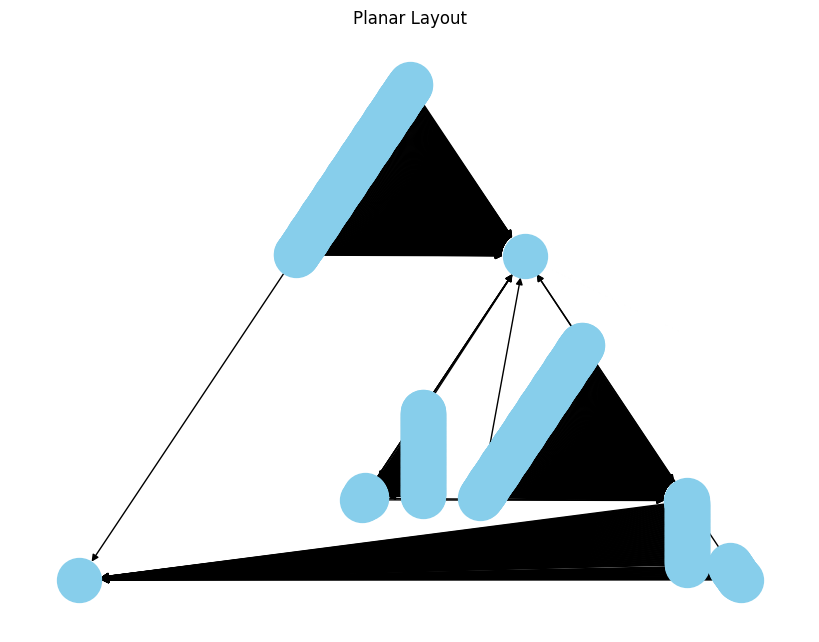

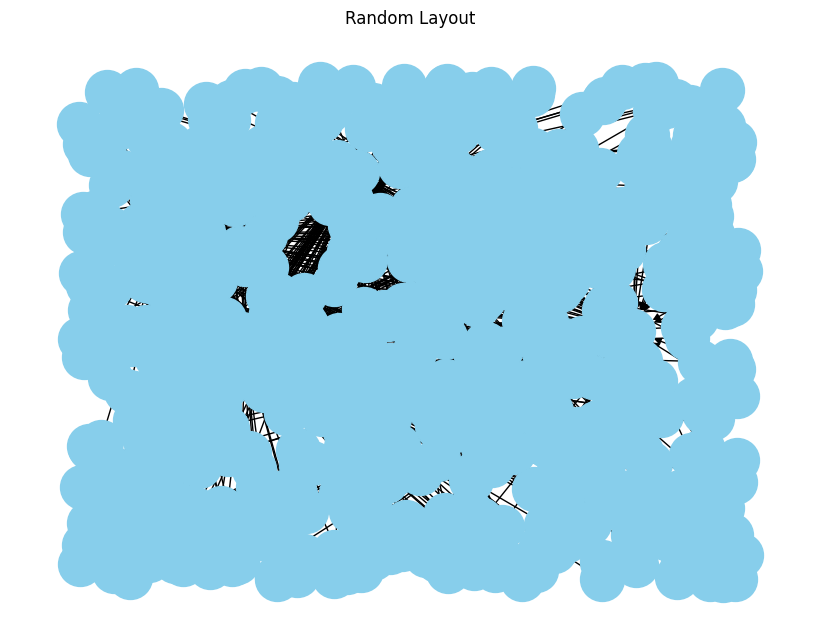

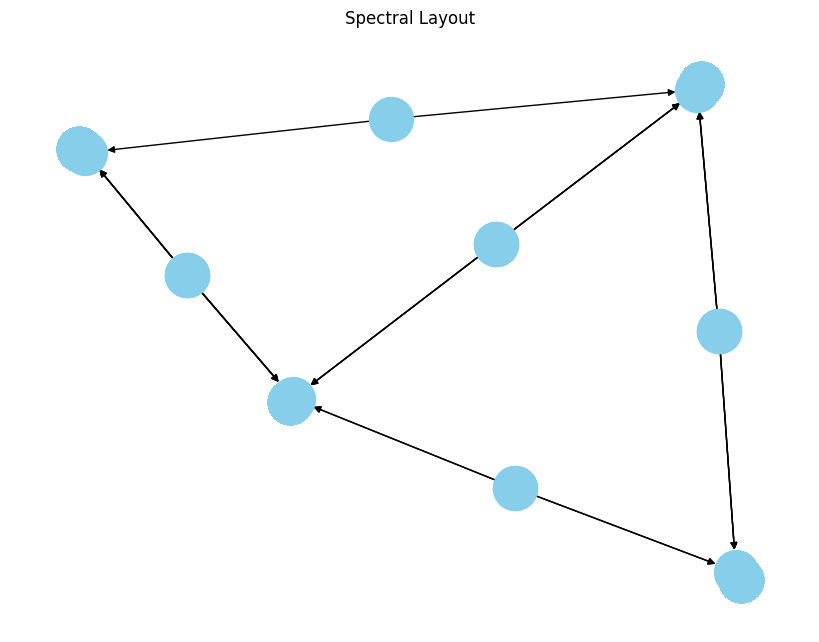

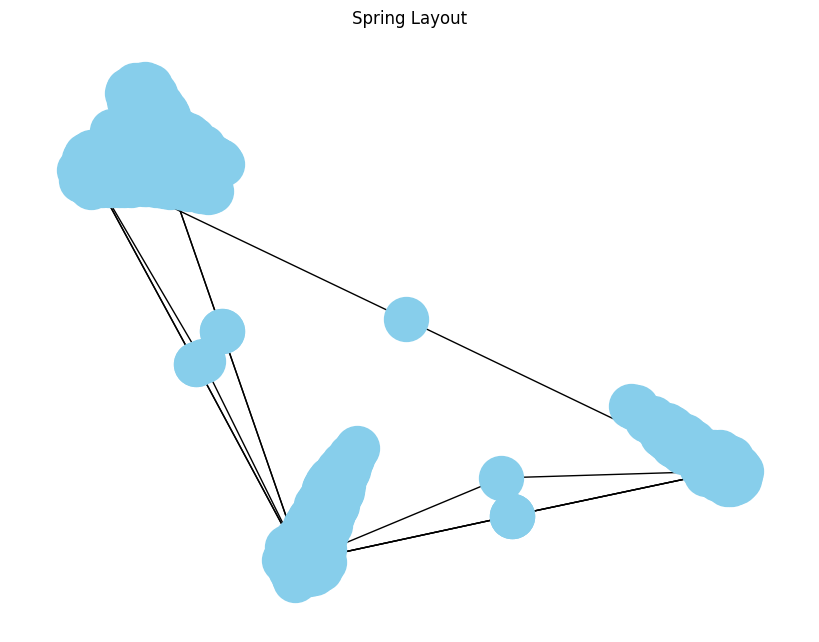

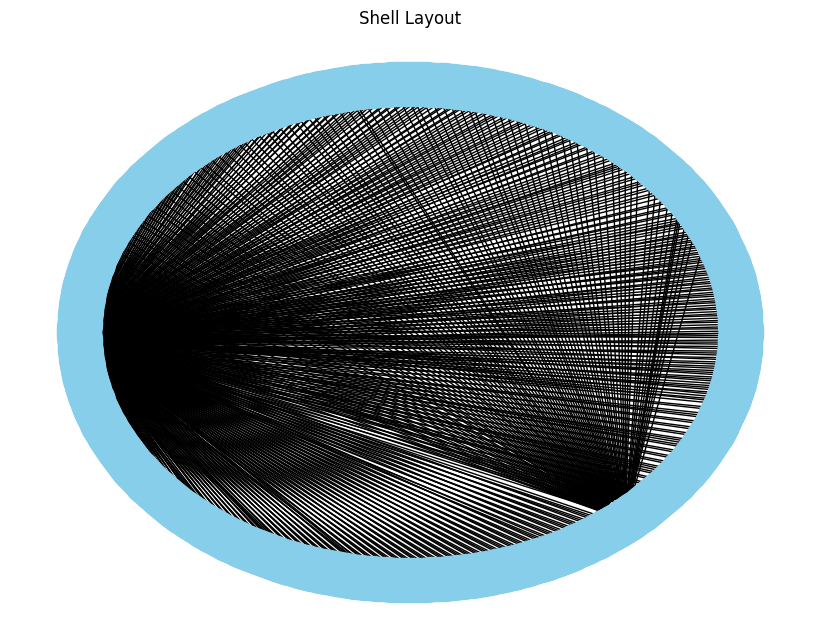

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Function to create the graph
def create_graph(df):
    G = nx.DiGraph()
    for index, row in df.iterrows():
        G.add_edge(row['User'], row['Platform'])
    return G

# Load the dataset
# df = pd.read_csv('/mnt/data/sentimentdataset.csv')

# Create the graph
G = create_graph(df)

# Define functions to draw the graph with different layouts without labels
def draw_circular(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue")
    plt.title(title)
    plt.show()

def draw_planar(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.planar_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue")
    plt.title(title)
    plt.show()

def draw_random(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.random_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue")
    plt.title(title)
    plt.show()

def draw_spectral(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spectral_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue")
    plt.title(title)
    plt.show()

def draw_spring(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue")
    plt.title(title)
    plt.show()

def draw_shell(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="skyblue")
    plt.title(title)
    plt.show()

# Draw the graph with different layouts without labels
draw_circular(G, "Circular Layout")
draw_planar(G, "Planar Layout")
draw_random(G, "Random Layout")
draw_spectral(G, "Spectral Layout")
draw_spring(G, "Spring Layout")
draw_shell(G, "Shell Layout")


Implementation of Flajolet-Martin algorithm

Estimated number of distinct elements: 1937.5260604940204


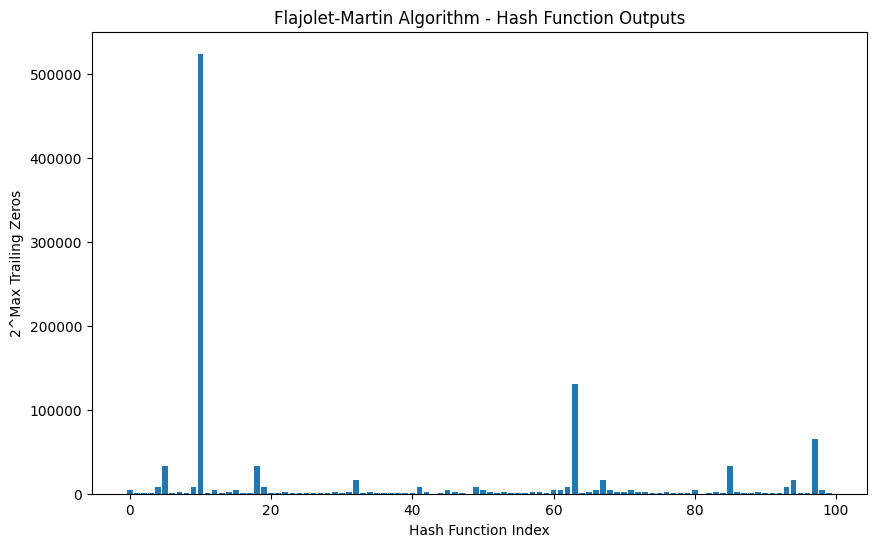

In [16]:
import pandas as pd
import hashlib
import numpy as np
import matplotlib.pyplot as plt

# Function to hash a string and return the binary representation
def hash_function(value, seed):
    result = hashlib.md5((str(value) + str(seed)).encode()).hexdigest()
    return bin(int(result, 16))[2:].zfill(128)

# Function to find the position of the least significant 1-bit
def least_significant_bit_position(binary_string):
    return len(binary_string) - binary_string.rfind('1')

# Flajolet-Martin algorithm
def flajolet_martin(data, num_hashes):
    max_trailing_zeros = [0] * num_hashes
    for item in data:
        for i in range(num_hashes):
            binary_hash = hash_function(item, i)
            lsb_position = least_significant_bit_position(binary_hash)
            max_trailing_zeros[i] = max(max_trailing_zeros[i], lsb_position)
    estimate = 2 ** (sum(max_trailing_zeros) / num_hashes)
    return estimate, max_trailing_zeros

# Load the dataset
# df = pd.read_csv('/mnt/data/sentimentdataset.csv')

# Extract the column you want to estimate distinct elements for (e.g., 'User')
data = df['User'].tolist()  # or df['Platform'] if estimating distinct platforms

# Estimate the number of distinct elements
num_hashes = 100  # Number of hash functions
estimated_count, max_trailing_zeros = flajolet_martin(data, num_hashes)
print(f"Estimated number of distinct elements: {estimated_count}")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(num_hashes), [2 ** x for x in max_trailing_zeros])
plt.xlabel('Hash Function Index')
plt.ylabel('2^Max Trailing Zeros')
plt.title('Flajolet-Martin Algorithm - Hash Function Outputs')
plt.show()


the algorithm estimates the number of unique users in the dataset.The Flajolet-Martin algorithm provides a probabilistic approach to estimating the number of distinct elements in large datasets.
The majority of the bars are relatively low, indicating that for most hash functions, the maximum number of trailing zeros observed is small.
There are a few significant spikes, most notably around hash function indices 10, 60, and near the end of the range. These spikes suggest that some hash functions encountered hash values with a large number of trailing zeros.

Centrality measures:

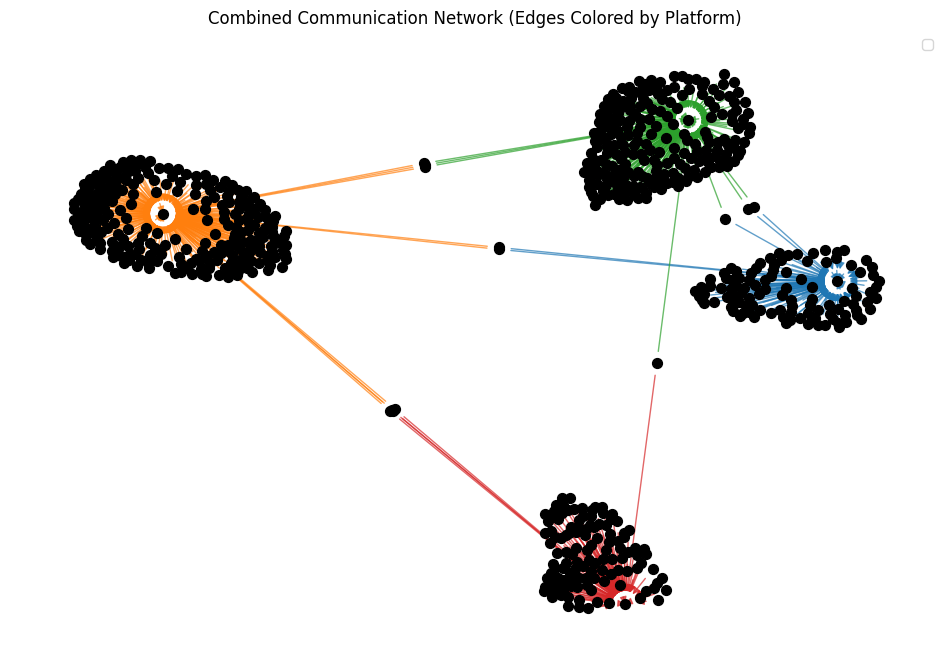

In [52]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load your dataset
df = pd.read_csv('/content/sentimentdataset.csv')

# Create a dictionary to store separate graphs for each platform
platform_graphs = {}

# Iterate over unique platforms and create a directed graph for each
for platform in df['Platform'].unique():
    platform_graphs[platform] = nx.DiGraph()

# Add edges based on retweets for each platform
for index, row in df.iterrows():
    platform_graphs[row['Platform']].add_edge(row['User'], row['Platform'])

# Combine all graphs
combined_graph = nx.DiGraph()
for platform_graph in platform_graphs.values():
    combined_graph.add_edges_from(platform_graph.edges())

# Calculate different centrality measures
degree_centrality = nx.degree_centrality(combined_graph)
betweenness_centrality = nx.betweenness_centrality(combined_graph)
closeness_centrality = nx.closeness_centrality(combined_graph)
eigenvector_centrality = nx.eigenvector_centrality(combined_graph)
pagerank = nx.pagerank(combined_graph)

# Generate a color map
colors = list(mcolors.TABLEAU_COLORS.values())
platform_color_map = {platform: colors[i % len(colors)] for i, platform in enumerate(platform_graphs.keys())}

# Visualize the combined communication network with different colors for each platform
plt.figure(figsize=(12, 8))

# Draw the nodes
pos_combined = nx.spring_layout(combined_graph, k=0.1)
nx.draw_networkx_nodes(combined_graph, pos_combined, node_size=50, node_color='black')

# Draw edges with different colors based on the platform
for platform, graph in platform_graphs.items():
    nx.draw_networkx_edges(combined_graph, pos_combined, edgelist=graph.edges(), edge_color=platform_color_map[platform], alpha=0.7, label=platform)

plt.title("Combined Communication Network (Edges Colored by Platform)")
plt.axis('off')  # Turn off axis
plt.legend()
plt.show()





In [53]:
# Print centrality measures for Instagram, Facebook, and Twitter only
print("Degree Centrality:")
a=0
for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True):
    if node.strip() in ['Twitter'] and a==0:
        print(f"{node.strip()}: {centrality}")
        a=a+1
    elif node.strip() in ['Instagram', 'Facebook']:
        print(f"{node.strip()}: {centrality}")
c=0
print("\nBetweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True):
  if node.strip() in ['Twitter'] and c==0:
        print(f"{node.strip()}: {centrality}")
        c=c+1
  elif node.strip() in ['Instagram', 'Facebook']:
        print(f"{node.strip()}: {centrality}")

print("\nCloseness Centrality:")
b=0
for node, centrality in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    if node.strip() in ['Twitter'] and b==0:
        print(f"{node.strip()}: {centrality}")
        b=b+1
    elif node.strip() in ['Instagram', 'Facebook']:
        print(f"{node.strip()}: {centrality}")
d,e=0,0
print("\nEigenvector Centrality:")
for node, centrality in sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True):
    if node.strip() in ['Twitter'] and d==0:
        print(f"{node.strip()}: {centrality}")
        d=d+1
    elif node.strip() in ['Instagram', 'Facebook']:
        print(f"{node.strip()}: {centrality}")

print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    if node.strip() in ['Twitter'] and e==0:
        print(f"{node.strip()}: {centrality}")
        e=e+1
    elif node.strip() in ['Instagram', 'Facebook']:
        print(f"{node.strip()}: {centrality}")


Degree Centrality:
Instagram: 0.3575581395348837
Facebook: 0.3183139534883721
Twitter: 0.17732558139534885

Betweenness Centrality:
Twitter: 0.0
Instagram: 0.0
Facebook: 0.0

Closeness Centrality:
Instagram: 0.35755813953488375
Facebook: 0.3183139534883721
Twitter: 0.17732558139534885

Eigenvector Centrality:
Instagram: 0.667828201457908
Facebook: 0.5945356056847454
Twitter: 0.3312251690181981

PageRank:
Instagram: 5.121774687153132e-05
Facebook: 5.121774687153132e-05
Twitter: 5.121774687153132e-05


COMMUNITY DETECTION

In [71]:
import pandas as pd
import networkx as nx
from itertools import combinations
from networkx.algorithms.community import girvan_newman
import community as community_louvain
import matplotlib.pyplot as plt


G = nx.Graph()

# Add nodes (users)
users = df['User'].unique()
G.add_nodes_from(users)

# Create edges based on shared hashtags
for _, group in df.groupby('Hashtags'):
    users_in_group = group['User'].unique()
    if len(users_in_group) > 1:
        for user1, user2 in combinations(users_in_group, 2):
            if G.has_edge(user1, user2):
                G[user1][user2]['weight'] += 1
            else:
                G.add_edge(user1, user2, weight=1)

# Girvan-Newman Algorithm
girvan_newman_communities = next(girvan_newman(G))
gn_communities = [list(community) for community in girvan_newman_communities]


# Print the communities detected by the Girvan-Newman algorithm
print("Girvan-Newman Communities:")
for i, community in enumerate(gn_communities):
    print(f"Community {i+1}: {community}")





Girvan-Newman Communities:
Community 1: [' User123      ']
Community 2: [' CommuterX    ']
Community 3: [' FitnessFan   ']
Community 4: [' AdventureX   ']
Community 5: [' ChefCook     ']
Community 6: [' GratitudeNow ']
Community 7: [' RainyDays    ']
Community 8: [' MovieBuff    ']
Community 9: [' DebateTalk   ']
Community 10: [' BeachLover   ']
Community 11: [' BloggerX     ']
Community 12: [' WellnessCheck']
Community 13: [' UrbanExplorer']
Community 14: [' FitJourney   ']
Community 15: [' TechEnthusiast']
Community 16: [' Reflections  ']
Community 17: [' PetAdopter   ']
Community 18: [' GamerX       ']
Community 19: [' TechConference']
Community 20: [' WinterBlues  ']
Community 21: [' Bookworm     ']
Community 22: [' VRExplorer   ']
Community 23: [' ProductivityPro']
Community 24: [' FitnessWarrior']
Community 25: [' CareerMilestone']
Community 26: [' BrunchBuddy  ']
Community 27: [' LanguageLearner']
Community 28: [' BookLover    ']
Community 29: [' MentalHealthMatters']
Community 

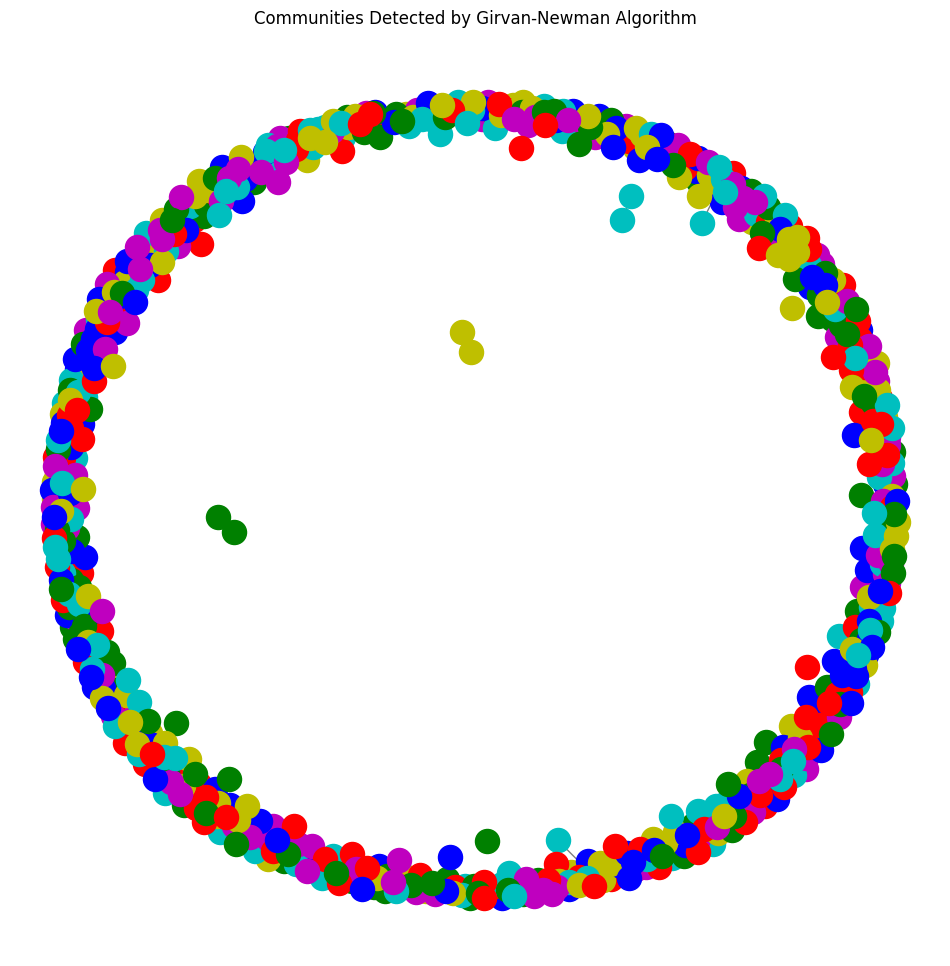

In [76]:
import pandas as pd
import networkx as nx
from itertools import combinations
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sentimentdataset.csv'
data = pd.read_csv(file_path)

# Initialize an empty graph
G = nx.Graph()

# Add nodes (users)
users = data['User'].unique()
G.add_nodes_from(users)

# Create edges based on shared hashtags
for _, group in data.groupby('Hashtags'):
    users_in_group = group['User'].unique()
    if len(users_in_group) > 1:
        for user1, user2 in combinations(users_in_group, 2):
            if G.has_edge(user1, user2):
                G[user1][user2]['weight'] += 1
            else:
                G.add_edge(user1, user2, weight=1)

# Girvan-Newman Algorithm
girvan_newman_communities = next(girvan_newman(G))
gn_communities = [list(community) for community in girvan_newman_communities]

# Plotting the communities detected by the Girvan-Newman algorithm
plt.figure(figsize=(12, 12))

# Adjusting layout parameters for better spacing
pos = nx.spring_layout(G, k=0.3, iterations=100)

colors = ['r', 'b', 'g', 'y', 'c', 'm']
for i, community in enumerate(gn_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=300)

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities Detected by Girvan-Newman Algorithm")
plt.axis('off')  # Turn off the axis
plt.show()


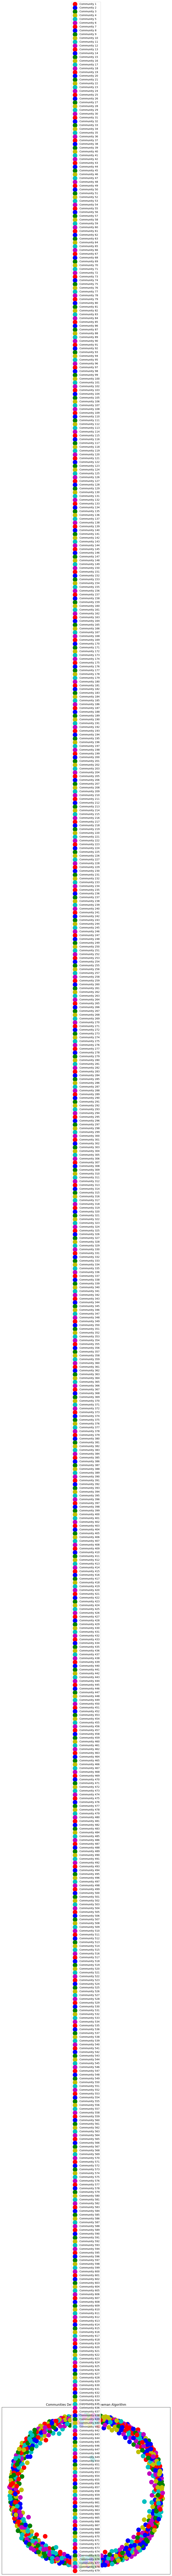

In [75]:
import pandas as pd
import networkx as nx
from itertools import combinations
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sentimentdataset.csv'
data = pd.read_csv(file_path)

# Initialize an empty graph
G = nx.Graph()

# Add nodes (users)
users = data['User'].unique()
G.add_nodes_from(users)

# Create edges based on shared hashtags
for _, group in data.groupby('Hashtags'):
    users_in_group = group['User'].unique()
    if len(users_in_group) > 1:
        for user1, user2 in combinations(users_in_group, 2):
            if G.has_edge(user1, user2):
                G[user1][user2]['weight'] += 1
            else:
                G.add_edge(user1, user2, weight=1)

# Girvan-Newman Algorithm
girvan_newman_communities = next(girvan_newman(G))
gn_communities = [list(community) for community in girvan_newman_communities]

# Plotting the communities detected by the Girvan-Newman algorithm
pos = nx.spring_layout(G, k=0.1, iterations=50)  # Adjusting parameters for better spacing
plt.figure(figsize=(12, 12))

colors = ['r', 'b', 'g', 'y', 'c', 'm']
for i, community in enumerate(gn_communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=300, label=f'Community {i+1}')  # Increased node size
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.legend()
plt.title("Communities Detected by Girvan-Newman Algorithm")
plt.show()
